# Лекция 1

## Конечно-разностные схемы


&nbsp; В данной лекции мы рассмотрим методы решения уравнений в частных производных, основанные на конечно-разностном приближении. Методы данного класса достаточно просты в реализации и позволяют наглядно продемонстировать ключевые понятия численных подходов к решению уравнений в частных производных. Несмотря на свою простоту конечно-разностные методы до сих пор находят свое применение при решении широкого класса задач математического моделирования физических процессов.

### 1. Конечно-разностная аппроксимация производных

&nbsp; Задачей настоящего курса является знакомство с методами приближенного решения дифференциальных уравнений, то есть нахождения функции (или её приближения), которая бы удовлетворяла заданным взаимосвязям между её производными в некоторой заданной области пространства и/или времени, а также граничным условиям. Нахождение точного решения дифференциального уравнения возможно лишь в редких случаях. Одним из подходов к решению дифференциальных уравнений является конечно-разностный подход. В рамках данного подхода производные в дифференциальных уравнениях заменяются конечно-разностными аппроксимациями. В результате получается большая, но конечная система алгебраических уравнений. Таким образом решение дифференциального уравнения сводится к решению системы алгебраических уравнений, что легко может быть выполнено с помощью компьютера. 

&nbsp; Для того, чтобы начать изучение конечно-разностных методов необходимо, в первую очередь, познакомится с понятием конечно-разностной аппроксимации производной. Пусть $u(x)$ представляет собой функцию одной переменной, которая подразумевается гладкой, дифференцируемой требуемое количество раз и каждая из производных определена и ограничена на интервале, содержащем интересующую нас точку с координатой $\bar x$. Предположим, что нам необходимо найти приближение производной $u'(\bar x)$, используя конечное число известных значений фунции в окрестности точки $\bar x$. Наиболее очевидным способом нахождения производной будет использование следующего приближенного выражения:

\begin{equation}
D_+u(\bar x) \equiv \frac{u(\bar x + h)-u(\bar x)}{h}
\label{eq:forward_diff}
\end{equation}

для малого значения $h$. При стремлении $h \to 0$ данное выражение представляет собой стандартное определение производной. $D_+u(\bar x)$ есть ничто иное как угол наклона прямой проведенной через точки $u(\bar x)$ и $u(\bar x + h)$.

&nbsp; Выражение $\eqref{eq:forward_diff}$ представляет собой *одностороннюю аппроксимацию* $u'$ в точке $\bar x$, так как в неё входят значения $x$ только справа от $\bar x$, $x \ge \bar x$. Можно предложить и другую одностороннюю аппроксимацию:

\begin{equation}
D_-u(\bar x) \equiv \frac{u(\bar x)-u(\bar x - h)}{h}
\label{eq:backward_diff}
\end{equation}

&nbsp; Обе односторонние аппроксимации $\eqref{eq:forward_diff}$ и $\eqref{eq:backward_diff}$ имеют *первый порядок точности* приближения производной $u'$, что означает, что величина ошибки аппроксимации пропорциональна значению $h$. 

&nbsp; Другой возможностью является использование *центральной аппроксимации*:

\begin{equation}
D_0u(\bar x) \equiv \frac{u(\bar x + h)-u(\bar x - h)}{2h} = \frac{1}{2}\left(D_+u(\bar x) + D_-u(\bar x) \right)
\label{eq:centered_diff}
\end{equation}

Данное выражение определяет угол наклона линии проведенной через точки $u(\bar x - h)$ и $u(\bar x + h)$, который, как не сложно видеть из [рисунка 1](#figure1), является среним арифметическим от двух односторонних аппроксимаций приведенных выше. Из рисунка можно заметить, что угол наклона секущей $D_0u(\bar x)$ лучше соответствует углу наклона касательной к графику функции $u(x)$ в точке $\bar x$, а значит выражение $\eqref{eq:forward_diff}$ позволяет получить более точную аппроксимацию производной $u'$, чем выражения $\eqref{eq:forward_diff}$ и $\eqref{eq:backward_diff}$. Действительно, центральная разность $\eqref{eq:forward_diff}$ имеет второй порядок точности, ошибка аппроксимации пропорциональна $h^2$, и с уменьшением $h$ убывает гораздо быстрее, чем для односторонних аппроксимаций первого порядка точности.

<a id = "figure1"></a>
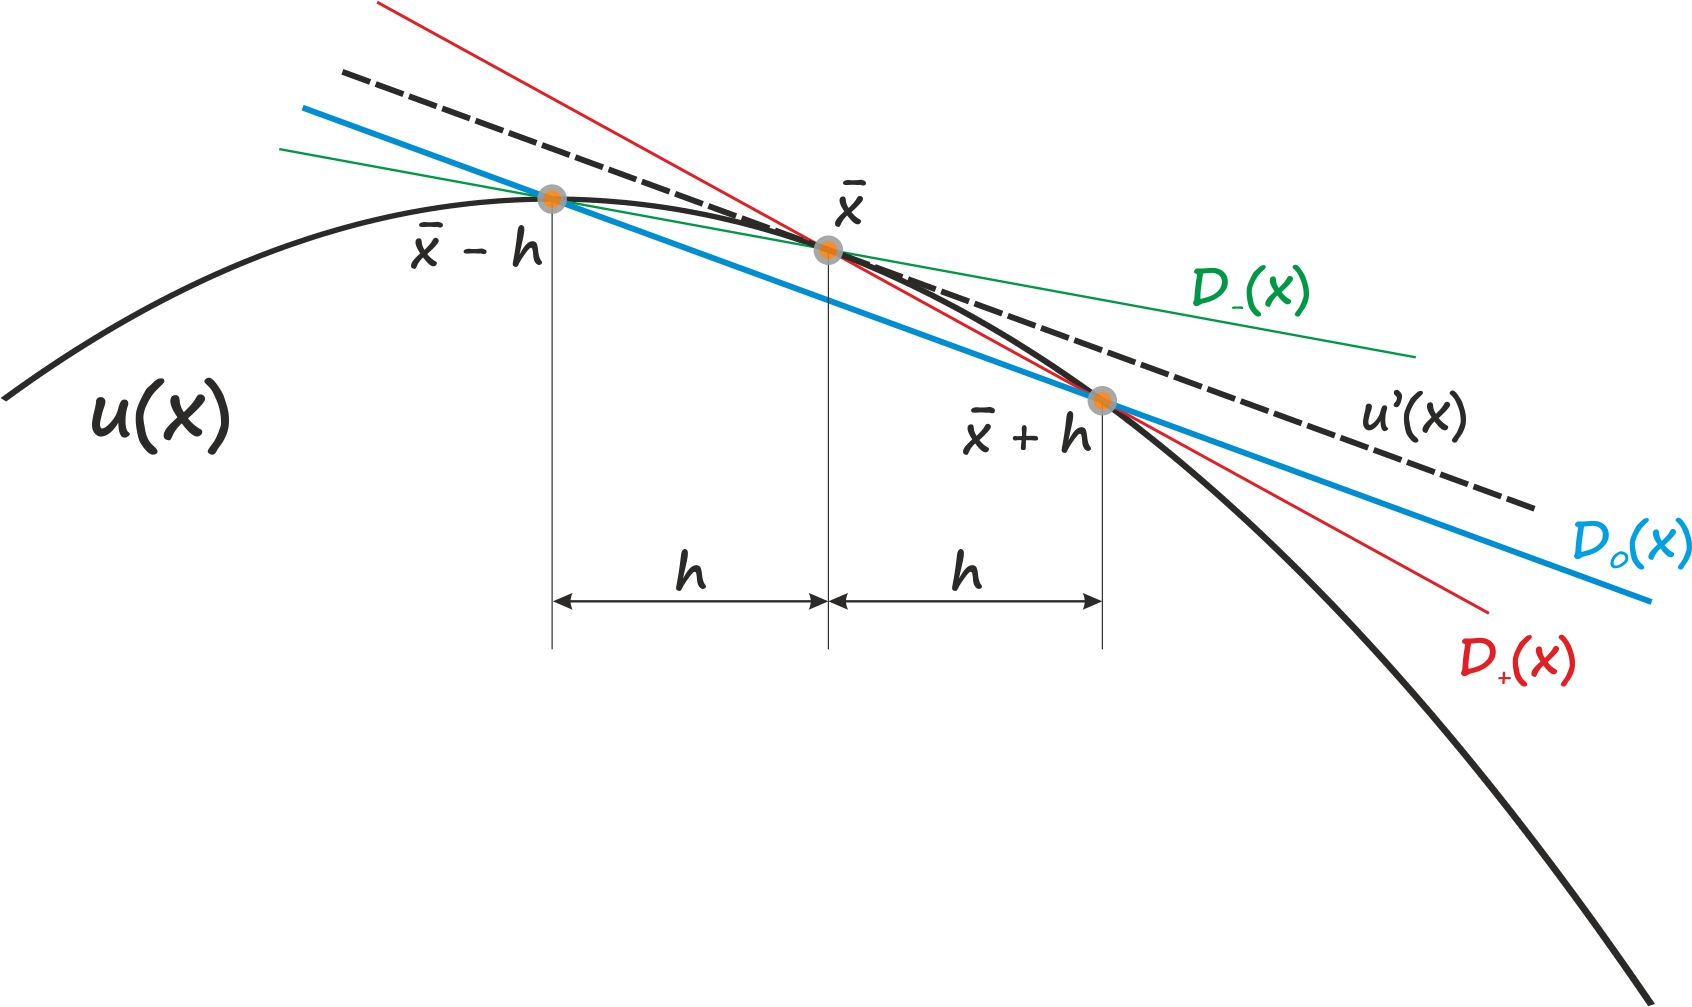
&nbsp; Рисунок 1. Конечно разностные аппроксимации производной $u'(\bar x)$.

&nbsp; Кроме представленных выше вариантов аппроксимации производной возможны и многие другие. К примеру выражение

\begin{equation}
D_3u(\bar x) \equiv \frac{1}{6h} \left( 2u(\bar x + h) + 3u(\bar x) - 6u(\bar x - h) + 2u(\bar x - 2h) \right)
\label{eq:thirdorder_diff}
\end{equation}

аппроксимирует производную $u'(\bar x)$ с третьим порядком точности - при малых $h$ ошибка пропорциональна $h^3$. Ниже мы рассмотрим подходы к нахождению конечно-разностных аппроксимаций с заданным порядком точности и шаблоном, сейчас же проанализируем ошибки аппроксимации получаемые при использовании выражений $\eqref{eq:forward_diff}$ - $\eqref{eq:thirdorder_diff}$.

<a id = "example_1"></a>
#### Пример 1. 
&nbsp; Пусть $u(x)=\mathrm{sin}(5x)$ и мы хотим отыскать производную в точке $\bar x = 1$. Зная функцию мы можем отыскать аналитическое выражение для производной. Воспользуемся для этого возможностями символьных вычислений библиотеки **SymPy**. Загрузим сначала все модули, необходимые для нахождения производной. 

In [1]:
from sympy import sin         # символьная реализация функции sin(x)
from sympy import (symbols,   # символы для вычислений
diff,     # операции символьного дифференцирования
lambdify  # преобразование символьных выражений в функции python
)

In [2]:
x    = symbols('x')    # символ независимой пременной x
func = sin(5*x)        # исследуемая фнункция

deriv = diff(func,x)
deriv

5*cos(5*x)

&nbsp; Итак, после выполнения операции дифференцирования, в переменной `deriv` мы получили в символьном виде производную функции {{func}}, $u'(x) = $ {{deriv}}. Для нахождения производной от функции в точке, нам необходимо преобразовать символьное выражение `deriv` в вычисляемый вид. Для этого воспользуемся функцией пакета **SymPy** [`lambdify`](https://docs.sympy.org/latest/modules/utilities/lambdify.html). 

In [3]:
deriv = lambdify(x,diff(func,x))  # перобразование производной из символьного вида 
                                  # в функцию python

x_bar = 1.0                  # координата x_bar в которой необходимо вычислить производную
deriv_value = deriv(x_bar)   # расчет производной в точке x_bar 
deriv_value

1.4183109273161312

&nbsp; Итак, мы получили точное значение производной $u'(1) = $ {{deriv_value}}. Воспользуемся приближенными формулами для вычисления производной и проанализируем, как ведет себя ошибка при их использовании при уменьшении величины $h$. 

In [4]:
func = lambdify(x,sin(5*x))

def forward_difference(h,x):
    deriv_approximation = (func(x+h)-func(x))/h
    return(deriv_approximation)
def backward_difference(h,x):
    deriv_approximation = (func(x)-func(x-h))/h
    return(deriv_approximation)
def centered_difference(h,x):
    deriv_approximation = (func(x+h)-func(x-h))/(2*h)
    return(deriv_approximation)  
def thirdorder_difference(h,x):
    deriv_approximation = (2*func(x+h)+3*func(x)-6*func(x-h)+func(x-2*h))/(6*h)
    return(deriv_approximation)  

In [5]:
error = [[0 for x in range(10)] for y in range(4)]
h = [0 for x in range(10)]

h[0] = 1.0e-01
for i in range (0,10):
    h[i]        = h[0]/(2.0**i)
    error[0][i] = forward_difference(h[i],x_bar)
    error[1][i] = backward_difference(h[i],x_bar)
    error[2][i] = centered_difference(h[i],x_bar)
    error[3][i] = thirdorder_difference(h[i],x_bar)
   
error = abs(error - deriv_value)

&nbsp; Полученное абсолютное значение ошибки `error` можно представить в виде таблицы:

| h           | $D_+(x)$        | $D_-(x)$        | $D_0(x)$        | $D_3(x)$        |
| :----------:|:---------------:| :--------------:|:---------------:| :--------------:|
| {{'{:.2e}'.format(h[0])}}     | {{'{:.2e}'.format(error[0][0])}} | {{'{:.2e}'.format(error[1][0])}} | {{'{:.2e}'.format(error[2][0])}} | {{'{:.2e}'.format(error[3][0])}} | 
| {{'{:.2e}'.format(h[4])}}     | {{'{:.2e}'.format(error[0][4])}} | {{'{:.2e}'.format(error[1][4])}} | {{'{:.2e}'.format(error[2][4])}} | {{'{:.2e}'.format(error[3][4])}} | 
| {{'{:.2e}'.format(h[9])}}     | {{'{:.2e}'.format(error[0][9])}} | {{'{:.2e}'.format(error[1][9])}} | {{'{:.2e}'.format(error[2][9])}} | {{'{:.2e}'.format(error[3][9])}} | 

&nbsp; Как и предполагалось, ошибка убывает быстрее всего с уменьшением $h$ при использовании выражения третьего порядка точности $D_3(x)$ $\eqref{eq:thirdorder_diff}$. Зависимость абсолютного значения ошибки от $h$ можно изобразить на графике в логарифмических координатах:

In [6]:
from numpy import linspace

import matplotlib.pyplot as plt


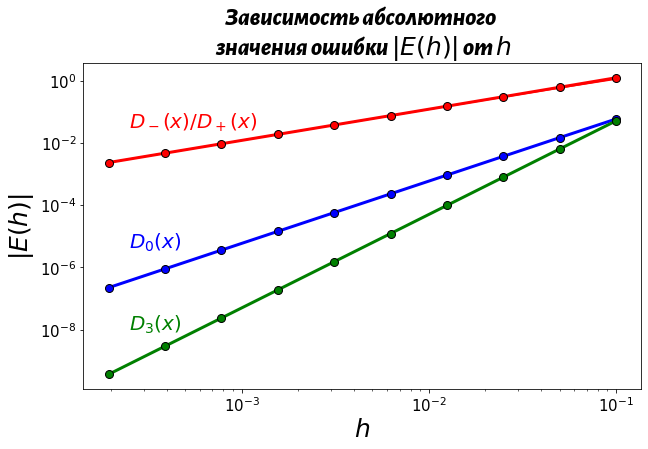

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Зависимость абсолютного \n значения ошибки $|E(h)|$ от $h$', fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

plt.plot(h, error[0][:],'r')
plt.plot(h, error[1][:],'r-o', markeredgecolor='black', linewidth=3,markersize=8)
plt.plot(h, error[2][:],'b-o', markeredgecolor='black', linewidth=3,markersize=8)
plt.plot(h, error[3][:],'g-o', markeredgecolor='black', linewidth=3,markersize=8)

plt.text(0.00025, 3e-02, '$D_-(x)/D_+(x)$',fontsize = 20,color='r')
plt.text(0.00025, 4e-06, '$D_0(x)$',fontsize = 20,color='b')
plt.text(0.00025, 1e-08, '$D_3(x)$',fontsize = 20,color='g')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xscale('log')
plt.yscale('log')

ax.set_ylabel("$|E(h)|$",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_xlabel("$h$",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
plt.show()

&nbsp; Графики зависимости абсолютной ошибки от величины $h$ представляют собой линии в логарифмических координатах. Как было указано выше, ошибка получаемая при использовании разных аппроксимаций производной может быть пропроциональна разным степеням $h$:

\begin{equation}
E(h) \approx C h^p
\label{eq:error}
\end{equation}

&nbsp; Тогда логарифмируя получим:

\begin{equation}
\mathrm{log}|E(h)| \approx \mathrm{log}|C| + p \mathrm{log} h
\label{eq:log_error}
\end{equation}

&nbsp; Таким образом, в log-log системе координат зависимость ошибки от шага представляет собой прямую, что и было продемонстировано на рисунке выше. Наклон линии, или степень $h$ в $\eqref{eq:error}$, $p$, называется порядком точности. Вычислим порядки точности для различных аппроксимаций: 

In [8]:
from numpy import log

p_forward    = (log(error[0][1])-log(error[0][0]))/(log(h[1])-log(h[0]))
p_backward   = (log(error[1][1])-log(error[1][0]))/(log(h[1])-log(h[0]))
p_centered   = (log(error[2][1])-log(error[2][0]))/(log(h[1])-log(h[0]))
p_thirdorder = (log(error[3][1])-log(error[3][0]))/(log(h[1])-log(h[0]))
(p_forward, p_backward, p_centered, p_thirdorder)

(0.9399143241436873, 1.0121937849270617, 1.986469731783887, 2.9965116124550306)

&nbsp; Итак, для односторонних разностей $D_+(x)$ и $D_-(x)$ порядок точности $p$ составляет  соответственно {{'{:.2e}'.format(p_forward)}} и {{'{:.2e}'.format(p_backward)}}. Как и предполагалось, полученные значения близки к 1. Для центральной разности $D_0(x)$ порядок точности {{'{:.2e}'.format(p_centered)}}, для разности третьего порядка $D_3(x)$ порядок точности {{'{:.2e}'.format(p_thirdorder)}}.

### 2. Ошибки округления

&nbsp; В данном разделе мы обоснуем эмпирические результаты, полученные выше. Стандартным подходом к анализу ошибки конечно-разностной аппроксимации является представление функции в ряде степенного ряда Тейлора в окрестности точки $\bar x$, к примеру:
\begin{equation}
u(\bar x + h) = u(\bar x) + h u'(\bar x) + \frac{1}{2}h^2 u''(\bar x) + \frac{1}{6}h^3 u'''(\bar x) + O(h^4)
\label{eq:taylor_forward}
\end{equation}
\begin{equation}
u(\bar x - h) = u(\bar x) - h u'(\bar x) + \frac{1}{2}h^2 u''(\bar x) - \frac{1}{6}h^3 u'''(\bar x) + O(h^4)
\label{eq:taylor_backward}
\end{equation}

&nbsp; Данные разложения справедливы, в том случае если функция $u(x)$ достаточно гладкая вблизи $\bar x$. Небольшое напоминание о нотации $O(h)$ и $o(h)$ приведено ниже в секции. В дальнейшем мы будем интенсивно использовать эту нотацию. 
    Используя $\eqref{eq:taylor_forward}$ можно вычислить разность $\eqref{eq:forward_diff}$:
    
\begin{equation*}
D_+u(\bar x) = \frac{u(\bar x - h) - u(\bar x)}{h} = u'(\bar x) + \frac{1}{2} h u''(\bar x) + \frac{1}{6} h^2 u'''(\bar x) + O(h^3)
\end{equation*}

Соответственно ошибка аппроксимации $u'(\bar x)$ равна:
\begin{equation*}
D_+u(\bar x) - u'(\bar x) = \frac{1}{2} h u''(\bar x) + \frac{1}{6} h^2 u'''(\bar x) + O(h^3)
\end{equation*}

$u''(\bar x)$, $u'''(\bar x)$ и другие производные являются константами, не зависящими от $h$. Для малых $h$ ошибка будет определяться первым слагаемым $\frac{1}{2} h u''(\bar x)$, остальные слагаемые будут меньше так как зависят от более высоких степеней $h$. Таким образом, для $D_+u(\bar x)$ ошибка равна произведению константы на $h$, причем значение этой константы примерно равно $\frac{1}{2} h u''(\bar x)$.  

#### Задача 1. 
> Найдите константу $С$ в оценке абсолютной ошибки $\eqref{eq:error}$ для аппроксимации $D_+u(\bar x)$. Проверьте, соответствует ли она $\frac{1}{2} u''(\bar x)$ для функции $u(x)=\mathrm{sin}(5x)$, $\bar x = 1$ из [Примера 1](#example_1). Между полученными значениями могут быть небольшие расхождения. Почему?

Для $D_-u(\bar x)$ аналогичные выкладки на основе $\eqref{eq:taylor_backward}$ позволяют получить следующее выражение для ошибки:

\begin{equation*}
D_-u(\bar x) - u'(\bar x) = -\frac{1}{2} h u''(\bar x) + \frac{1}{6} h^2 u'''(\bar x) + O(h^3)
\end{equation*}

что также соотвествует нашим наблюдениям.

Складывая $\eqref{eq:taylor_forward}$ и $\eqref{eq:taylor_backward}$ получим

\begin{equation*}
u(\bar x + h) - u'(\bar x - h) = 2 h u'(\bar x) + \frac{1}{3} h^3 u'''(\bar x) + O(h^5)
\end{equation*}

откуда
\begin{equation*}
D_0u(\bar x) - u'(\bar x) = \frac{1}{6} h^2 u'''(\bar x) + O(h^4)
\end{equation*}

что подтверждает второй порядок точности формулы центральной разности. 

#### Задача 2.
> Используя $\eqref{eq:taylor_forward}$ и $\eqref{eq:taylor_backward}$ и разложение в ряд Тейлора для $u(\bar x + 2h)$, докажите, что формула $D_3u(\bar x)$ $\eqref{eq:thirdorder_diff}$ аппроксимирует производную функции $u(\bar x)$ с третьим порядком точности.  



### 3. Получение конечно-разностных аппроксимаций
<a id = "s_sec3"></a>

Пусть мы хотим найти конечно-разностную аппроксимацию производной $u'(\bar x)$, в которой используются только определенные точки. Для этого можно воспользоваться разложением в ряд Тейлора и методом неопределенных коэффициентов.

#### Пример 2.
Предположим что нам нужно найтиодностороннюю аппроксимацию производной $u'(\bar x)$ используя лишь точки $u(\bar x)$, $u(\bar x - h)$, $u(\bar x - 2h)$. Выражение для аппроксимации можно записать в параметрическом виде:

\begin{equation}
D_2u(\bar x) = a u(\bar x) + b u(\bar x - h) + c u(\bar x - 2h)
\label{eq:onesided_diff}
\end{equation}

Коэффициенты $a$, $b$ и $c$ необходимо подобрать таким образом, чтобы аппроксимировать производную с как можно большей точностью. Для этого запишем ряды Тейлора для $u(\bar x - h)$ и $u(\bar x - 2h)$, и сгруппируем слагаемые. Представление в виде ряда для $u(\bar x - h)$ приведено $\eqref{eq:taylor_backward}$, для $u(\bar x - 2h)$ запишем:

\begin{equation}
u(\bar x - 2h) = u(\bar x) - 2 h u'(\bar x) + \frac{1}{2}(2h)^2 u''(\bar x) + \frac{1}{6}(2h)^3 u'''(\bar x) + O(h^4)
\label{eq:taylor_2backward}
\end{equation}

Используя $\eqref{eq:taylor_backward}$ и $\eqref{eq:taylor_2backward}$ в выражении $\eqref{eq:onesided_diff}$ получим:

\begin{equation*}
D_2u(\bar x) = (a+b+c) u(\bar x) - (b + 2c) h u'(\bar x) + \frac{1}{2}(b + 4c)h^2 u''(\bar x) - \frac{1}{6}(b+8c)h^3u'''(x)+...
\end{equation*}

Чтобы получить наибольший порядок нем необходимо избавиться от слагаемых пропорциональных малым степеням $h$. Это условие приводит нас к системе алгебраических уравнений:

\begin{cases} a+b+c = 0 \\ b+2c=-1/h \\ b+4c=0 
\end{cases}

Найдем решение данной системы:

In [9]:
a = symbols('a')
b = symbols('b')
c = symbols('c')
h = symbols('h')
from sympy import solve
sol = solve((a+b+c, b+2*c+1/h, b+4*c), a, b, c,  dict=True)
sol[0][a], sol[0][b], sol[0][c]

(3/(2*h), -2/h, 1/(2*h))

Итак, решением системы являются значения $a=$ {{sol[0][a]}}, $b=$ {{sol[0][b]}}, $c=$ {{sol[0][c]}}. Искомое выражение для конечно разностной аппроксимации $\eqref{eq:onesided_diff}$:  
\begin{equation}
D_2u(\bar x) = \frac{1}{2h} \left[ 3 u(\bar x) - 4 u(\bar x - h) + u(\bar x - 2h) \right]
\label{eq:onesided_diff_final}
\end{equation}

#### Задача 3.
> Выведите выражение для ошибки аппроксимации $D_2u(\bar x)$ $\eqref{eq:onesided_diff_final}$ и определите порядок точности.  

### 4. Аппроксимация производной второго порядка

Аппоксимация второй производной $u''(x)$ может быть получена схожим образом. Наиболее распространен следующий вид аппроксимации второй производной:

\begin{equation}
D^2u(\bar x) = \frac{1}{2}(u(\bar x - h) - 2u(\bar x) + u(\bar x +h)) \\
= u''(x) + \frac{1}{12}h^2u''''(\bar x) + O(h^4)
\label{eq:second_deriv}
\end{equation}

Это приближение может быть получено с помощью метода неопределенных коэффициентов. Другим подходом к нахождению аппроксимации второй производной является повтороное использование формул для производной первого порядка. Точно также как вторая производная является производной от первой производной, конечно разностная аппроксимация второй производной может быть получена двухкратным применением формул для нахождения первой производной:

\begin{equation*}
D^2u(\bar x) = D_+D_-u(\bar x)
\end{equation*}

Действительно,
\begin{equation*}
D_+(D_-u(\bar x)) = \frac{1}{h}\left[D_-u(\bar x+h) - D_-u(\bar x)\right] \\
= \frac{1}{h}\left[\left(\frac{u(\bar x+h) - u(\bar x)}{h}\right) - \left(\frac{u(\bar x) - u(\bar x-h)}{h}\right)\right] \\
= D^2u(\bar x)
\end{equation*}

Тоже самое можно получить применяя формулы конечных разностей в другом порядке $D^2u(\bar x) = D_-D_+u(\bar x)$ или дважды используя формулу центральных разностей для шага $h/2$:

\begin{equation*}
\hat D_0u(\bar x)=\frac{1}{h}\left(u(\bar x+h/2)-u(\bar x-h/2)\right)
\end{equation*}

Производные более высоких порядков можно также находить многократным использованием формул для производных первого порядка.
#### Пример 3
В качестве примера попробуем найти два варианта конечно-разностной аппроксимации третьей производной $u'''(\bar x)$. Используем для этого уже известные нам конечно-разностные аппроксимации:
\begin{equation}
D_+D^2u(\bar x)=\frac{1}{h^3}\left(u(\bar x+2h)-3u(\bar x+h) + 3u(\bar x) - u(\bar x -h)\right)
\label{eq:third_diff1}
\end{equation}

\begin{equation}
D_0D_+D_-u(\bar x)=\frac{1}{2h^3}\left(u(\bar x+2h)-2u(\bar x+h) + 2u(\bar x-h) -u(\bar x-2h)\right)
\label{eq:third_diff2}
\end{equation}

#### Задача 4
Определить порядок точности аппроксимаций третьей производной $\eqref{eq:third_diff1}$ и $\eqref{eq:third_diff2}$. 

### 5. Обобщенный подход к нахождению конечно-разностных аппоксимаций

Подход, который мы использовали для нахождения формул конечных разностей можно обобщить для автоматического нахождения формул конечных разностей обладающих требуемым порядком точности и использующих для расчета значения функции в определенном наборе точек (шаблоне разности). Построим такое обобщение для нахождения аппроксимации $k$-й производной $u(x)$ в точке $\bar x$, $u^{(k)}(\bar x)$. При этом потребуем, чтобы конечно-разностная аппороксимация использовала произвольный набор из $n \le k+1 $ значений функции $u(x)$ в точках $x_1,..., x_n$. Как правило сама точка $\bar x$ является одной из точек шаблона, но это не обязательно.
Пусть $u(x)$ достаточно гладкая функций, т.е. как минимум n+1 раз непрерывно дифференцируема в интервале содержащим точку $\bar x$ и остальные точки которые входят в интересующий нас шаблон разности. Поэтому мы можем записать разложения в ряд Тейлора в каждой из точек шаблона $x_i

\begin{equation}
u(x_i) = u(\bar x) + (x_i - \bar x)u'(\bar x) + ... + \frac{1}{k!}(x_i - \bar x)^k u^{(k)}(\bar x) + ...
\label{eq:stencil_taylor}
\end{equation}

для $i = 1,...,n$. Следуя методу неопределенных коэффициентов, составим линейную комбинацию этих разложений, которая как можно лучше аппроксимирует $u^(k)(\bar x)$:
\begin{equation}
c_1u(x_1) + c_2u(x_2) + ... + c_nu(x_n) = u^{(k)}(\bar x) + O(h^p)
\label{eq:general_approx}
\end{equation}
где порядок точности $p$ как можно более высокий. Следует отметить, что $h$ в данном случае есть некоторая мера шаблона. Если мы ищем аппоксимацию на шаблоне из равноудаленных точек, то $h$ есть расстояние между точками шаблона. Если же точки шаблона находятся на разных расстояниях, то $h$ есть неоторое среднее значение расстояния, которо можно оценить как $\mathrm{max}_{i \le i \le n} |x_i - \bar x| \le C h$, где $C$ - некоторая малая константа.

Как и ранее в [Cекции 3](#s_sec3) потребуем, чтобы при сложении рядов $\eqref{eq:stencil_taylor}$ сумма коэффициентов при слагаемых с наименьшими степенями $h$ обращалась в ноль, a коэффициенты при искомой производной обращались в 1.  

\begin{equation}
\frac{1}{(i-1)!}\sum^{n}_{j=1}c_j(x_j-\bar x)^{(i-1)} = \begin{cases}
    1,  & \text{если } i - 1 = k\\
    0,  & \text{в обратном случае}
\end{cases}
\label{vandermonde}
\end{equation}

Для $i = 1,...,n$. Если точки $x_j$ различны между собой, то система из $n \times n$ уравнений $\eqref{vandermonde}$ определена и имеет единственное решение. Если $n \le k$ (слишком мало точек в шаблоне), то правая часть всегда нулевая и решение также равно нулю. 

#### Пример 4.
> Реализуем подпрограмму для обобщенного подхода к нахождению шаблонов конечно-разностных аппроксимаций на базе метода неопределенных коэффиценов

In [10]:
from numpy import linalg
from math import factorial

def finite_difference_approx(k, stencil, x_bar):
    n = len(stencil)
    A = [[0 for x in range(n)] for y in range(n)]
    x_row = [0 for x in range(n)] 
    b = [0 for x in range(n)] 
    for i in range(0,n):
        x_row[i] = (stencil[i] - x_bar)
    for i in range(0,n):
        for j in range (0,n):
            A[i][j] = (x_row[j]**(i)) / factorial(i) 
    for i in range(0,n):
        if (i != k):
            b[i] = 0.0
        else:
            b[i] = 1.0
            
    c = linalg.solve(A,b)
    return(c)

Для проверки, попробуем применить функцию `finite_difference_approx` для нахождения аппорксимации третьей производной ($k=3$) по шаблону $u(\bar x+2h)$, $u(\bar x+h)$, $u(\bar x)$, $u(\bar x-h)$ (n=3). Нам уже известен вид такой аппроксимации $\eqref{eq:third_diff1}$, так что полученные коэффициенты должны совпасть с приведенными в $\eqref{eq:third_diff1}$.

In [11]:
h = 0.001
x_bar = 1.0
k = 3

stencil = (x_bar + 2*h, x_bar + h, x_bar, x_bar - h)
c = finite_difference_approx(k,stencil,x_bar)
c

array([ 1.e+09, -3.e+09,  3.e+09, -1.e+09])

В результате, мы получили коэффициенты $c_1=$ {{'{:.2e}'.format(c[0])}}, $c_2=$ {{'{:.2e}'.format(c[1])}}, $c_3=$ {{'{:.2e}'.format(c[2])}}, $c_4=$ {{'{:.2e}'.format(c[3])}}. Учитывая, что шаг заданный шаг сетки равен $h$={{'{:.2e}'.format(h)}}, можно видеть, что полученные коэффициенты совпадают с коэффициентами аппроксимации $\eqref{eq:third_diff1}$: $c_1=1/h^3$, $c_2=-3/h^3$, $c_3=3/h^3$, $c_4=-1/h^3$.

Какова точность аппроксимации $\eqref{eq:general_approx}$ с коэффициентами, полученными путем решения системы $\eqref{vandermonde}$? Правая часть системы уравнений для коэффициентов равна 1 только при $i = k + 1$, что необходимо для того чтобы сохранить необходимую нам производную в линейной комбинации рядов $\eqref{eq:stencil_taylor}$. Остальные правые части равны 0, это гарантирует, что слагаемые вида:
\begin{equation}
\left( \sum^n_{j=1} c_j (x_j - \bar x)^{i-1} \right)u^{i-1}(\bar x)
\end{equation}
не входят в линейную комбинацию рядов Тейлора для $i - 1 \neq k$. Для $i - 1 < k$ это необходимо для получения хотябы первого порядка точности. Для $i - 1 > k$ (что возможно только в том случае, если $n > k + 1$), это позволяет убрать из линейной комбинации слагаемые высокого порядка и получить разложения с порядком выше 1. В общем случае, порядок аппроксимации $p \ge n - k$. Он может быть даже выше, если в разложении сокращаются слагаемые высокого порядка (к примеру именно это происходит в случае центральных разностей). 

#### Задача 5.
Постройте конечно разностную аппроксимацию первой производной функции $u(x) = x^2 + sin(4x)$ с пятиточечным шаблоном в точке $\bar x = 1.0$. Установите её порядок точности.  

### Приложение. Ряд Тейлора и асимптотическое поведение функций

В данном приложении кратко напомним основные сведения о ряде Тейлора и символах *O* и *o*. Ряд Тейлора представляет собой разложение функции в степенной ряд в некоторой точке $a$:
\begin{equation}
f(x) = \sum_{n=0}^{\infty}\frac{f^{(n)}(a)}{n!}(x-a)^n
\label{eq:taylor}
\end{equation}

Если ограничить число слагаемых ряда, то с помощью ряда Тейлора можно приближенно найти значение функции в окрестности точки $a$, при этом точность оценки зависит от количества слагаемых использованных в разложении. Продемонстируем, как ведет себя приближение $f(x)$ в зависимости от числа слагаемых в ряде $\eqref{eq:taylor}$.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from sympy import  sin, cos
from sympy import (symbols, lambdify)

from IPython.display import HTML

plt.rc('animation', html='jshtml')

In [41]:
x = symbols('x')
f = sin(x)+cos(x)

taylor_order = [0 for x in range(0,5)] 
taylor       = [0 for x in range(0,5)] 
t_y_vals     = [0 for x in range(0,5)] 

for i in range(0,5):
    taylor_order[i] = f.series(x, 0, i+2)

    
func = lambdify(x, f,modules=['numpy'])

for i in range(0,5):
    taylor[i] = lambdify(x, taylor_order[i].removeO(),modules=['numpy'])

x_vals = np.linspace(-5, 5, 100)
func_y_vals = func(x_vals)


for i in range(0,5):
    t_y_vals[i] = taylor[i](x_vals)
    
taylor_order

[1 + x + O(x**2),
 1 + x - x**2/2 + O(x**3),
 1 + x - x**2/2 - x**3/6 + O(x**4),
 1 + x - x**2/2 - x**3/6 + x**4/24 + O(x**5),
 1 + x - x**2/2 - x**3/6 + x**4/24 + x**5/120 + O(x**6)]

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Аппроксимация функции $cos(x)+sin(x)$ в точке x = 0 \n рядами Тейлора с различным числом слагаемых n', fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

line = [0 for x in range(0,6)] 
color = [0 for x in range(0,6)] 
label = [0 for x in range(0,6)] 
color =('k-','b-','g-','m-','c-','y-')
label =('f(x)','n = 1','n = 2','n = 3','n = 4','n = 5')
line1, = ax.plot([], [], lw=2, color="Blue")
line2, = ax.plot([], [], lw=2, color="Black")

line[0], = ax.plot(x_vals, func_y_vals, color[0], linewidth=4, label = label[0])
for i in range(1,6):
    line[i], = ax.plot(x_vals, t_y_vals[i-1][:],color[i]+'-', linewidth=0.1, label = label[i])

leg = ax.legend(handles=[line[0],line[1],line[2],line[3],line[4],line[5]], loc ="upper right", prop={'size': 16})    
for legobj in leg.legendHandles[1:]:
    legobj.set_linewidth(2.0)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.ylim(-2.5,2.5)

ax.set_ylabel("$y$", rotation=0,fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_xlabel("$x$",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

ax.xaxis.set_label_coords(0.95, 0.48)
ax.yaxis.set_label_coords(0.54, 0.90)

def init():
    line[0], = ax.plot(x_vals, func_y_vals, color[0], linewidth=4, label = label[0])
    line1, = ax.plot(x_vals, func_y_vals, color[0], linewidth=4, label = label[0])
    return (line1,)

def animate(i):
    i = i + 1
#    line[i], = ax.plot(x_vals, t_y_vals[i-1][:],color[i], linewidth=2, label = label[i])
#    ax.legend(handles=[line[0],line[i]], loc ="upper right", prop={'size': 16})
    line2 = ax.plot(x_vals, t_y_vals[i-1][:],color[i]+'-', linewidth=2, label = label[i])
    return (line2,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=5, interval=400)

plt.close();
anim

In [16]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()